In [1]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = '/Users/thomascampbell/PyPSA-GB/PyPSA_GB'
os.chdir(src_path)

In [2]:
import pypsa
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import string
import numpy as np

import data_reader_writer
import generators
import Turbine_Power_Curve
import cf_data 

In [3]:
# write csv files for import
start = '2050-01-01 00:00:00'
end = '2050-01-31 23:30:00'
# year of simulation
year = int(start[0:4])
# time step as fraction of hour (default set to one hour to reduce computation)
time_step = 1

In [4]:
# scenario = 'Consumer Transformation'
#scenario = 'Falling Short'
#scenario = 'Steady Progression'
# scenario = 'System Transformation'
scenario='Leading The Way'
#FES scenarios

year_baseline = 2012

In [5]:
data_reader_writer.data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
                               scenario=scenario, FES=2022, merge_generators=True, scale_to_peak=True,
                               networkmodel='Reduced', P2G=True, tidal_stream_scenario='High')
#assemble a folder to contain all network info for the scenario

eload


/Users/thomascampbell/PyPSA-GB/PyPSA_GB/distance_calculator.py:33: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/Users/thomascampbell/PyPSA-GB/PyPSA_GB/distance_calculator.py:33: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/Users/thomascampbell/PyPSA-GB/PyPSA_GB/generators.py:802: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/Users/thomascampbell/PyPSA-GB/PyPSA_GB/distance_calculator.py:33: FutureW

                          Coal         Gas         Oil
2050-01-01 00:00:00  162.66601  111.018724  144.796921
2050-01-01 00:30:00  162.66601  111.018724  144.796921
2050-01-01 01:00:00  162.66601  111.018724  144.796921
2050-01-01 01:30:00  162.66601  111.018724  144.796921
2050-01-01 02:00:00  162.66601  111.018724  144.796921
...                        ...         ...         ...
2050-01-31 21:00:00  162.66601  111.018724  144.796921
2050-01-31 21:30:00  162.66601  111.018724  144.796921
2050-01-31 22:00:00  162.66601  111.018724  144.796921
2050-01-31 22:30:00  162.66601  111.018724  144.796921
2050-01-31 23:00:00  162.66601  111.018724  144.796921

[1487 rows x 3 columns]


/Users/thomascampbell/PyPSA-GB/PyPSA_GB/distance_calculator.py:33: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/Users/thomascampbell/PyPSA-GB/PyPSA_GB/add_P2G.py:65: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.



2010    168416.666667
2015    163364.166667
2020    158311.666667
2025    156863.283333
2030    155414.900000
2035    154842.283333
2040    154269.666667
2045    147634.050000
2050    140998.433333
Name: Biomass (co-firing), dtype: float64
2010    168416.666667
2015    163364.166667
2020    158311.666667
2025    156863.283333
2030    155414.900000
2035    154842.283333
2040    154269.666667
2045    147634.050000
2050    140998.433333
Name: Biomass (dedicated), dtype: float64
2010    168416.666667
2015    163364.166667
2020    158311.666667
2025    156863.283333
2030    155414.900000
2035    154842.283333
2040    154269.666667
2045    147634.050000
2050    140998.433333
Name: CCS Biomass, dtype: float64
2010    57333.333333
2015    56860.333333
2020    56387.333333
2025    55957.333333
2030    55527.333333
2035    55111.666667
2040    54696.000000
2045    54294.666667
2050    53893.333333
Name: CCS Gas, dtype: float64
2010    605960.0
2015    553880.0
2020    501800.0
2025    486740.0
2

In [6]:
network = pypsa.Network()
network.import_from_csv_folder('LOPF_data')
#call on PyPSA to create the network

/Users/thomascampbell/anaconda3/envs/PyPSA-GB/lib/python3.11/site-packages/pypsa/components.py:323: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

/Users/thomascampbell/anaconda3/envs/PyPSA-GB/lib/python3.11/site-packages/pypsa/components.py:323: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

/Users/thomascampbell/anaconda3/envs/PyPSA-GB/lib/python3.11/site-packages/pypsa/components.py:323: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

/Users/thomascampbell/anaconda3/envs/PyPSA-GB/lib/python3.11/

In [7]:

for gen in network.generators.index:
    if network.generators.loc[gen,'carrier'] != 'Tidal stream':
        network.generators.loc[gen,'p_nom_max']=1.1*network.generators.loc[gen,'p_nom']

#setting all non-tidal gens to have a Pmax +10% of their Pnom




P          2000000
u_rated       3.05
u_out          4.5
u_in             1
D               20
Name: AR2000, dtype: object
Site already in network, p_max_pu for Ald-Rac updated
P          1500000
u_rated          3
u_out            5
u_in             1
D               18
Name: AR1500, dtype: object
Site already in network, p_max_pu for Ald-Rac updated
P          1500000
u_rated       3.08
u_out          4.5
u_in             1
D               16
Name: Rotech, dtype: object
Site already in network, p_max_pu for Ald-Rac updated
P          1000000
u_rated        2.5
u_out          4.5
u_in             1
D               20
Name: Seagen S, dtype: object
Site already in network, p_max_pu for Ald-Rac updated
P          500000
u_rated       2.3
u_out         4.5
u_in          0.7
D              15
Name: Tidel, dtype: object
Site already in network, p_max_pu for Ald-Rac updated
P          1000000
u_rated        2.7
u_out          4.5
u_in             1
D               18
Name: Deepgen, dtype: ob

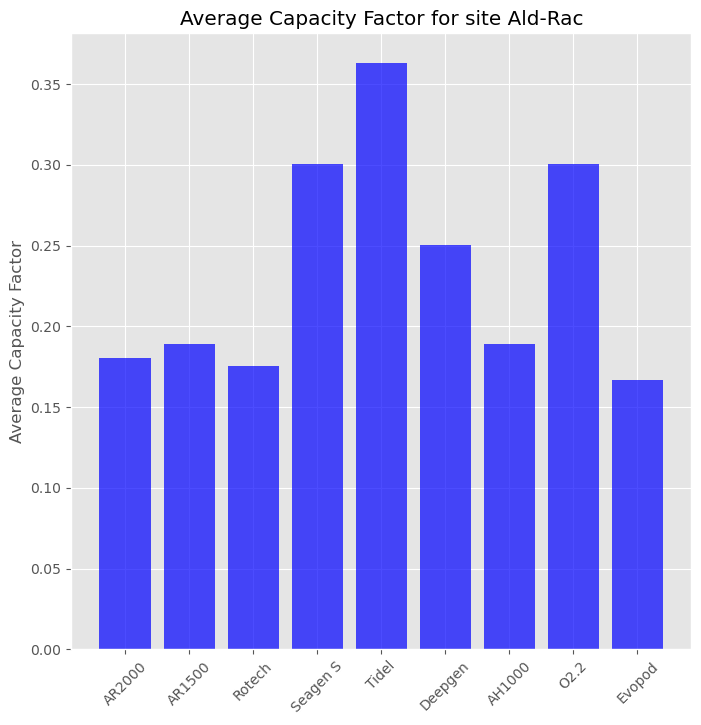

P          2000000
u_rated       3.05
u_out          4.5
u_in             1
D               20
Name: AR2000, dtype: object
Site already in network, p_max_pu for Kyl-Rhe updated
P          1500000
u_rated          3
u_out            5
u_in             1
D               18
Name: AR1500, dtype: object
Site already in network, p_max_pu for Kyl-Rhe updated
P          1500000
u_rated       3.08
u_out          4.5
u_in             1
D               16
Name: Rotech, dtype: object
Site already in network, p_max_pu for Kyl-Rhe updated
P          1000000
u_rated        2.5
u_out          4.5
u_in             1
D               20
Name: Seagen S, dtype: object
Site already in network, p_max_pu for Kyl-Rhe updated
P          500000
u_rated       2.3
u_out         4.5
u_in          0.7
D              15
Name: Tidel, dtype: object
Site already in network, p_max_pu for Kyl-Rhe updated
P          1000000
u_rated        2.7
u_out          4.5
u_in             1
D               18
Name: Deepgen, dtype: ob

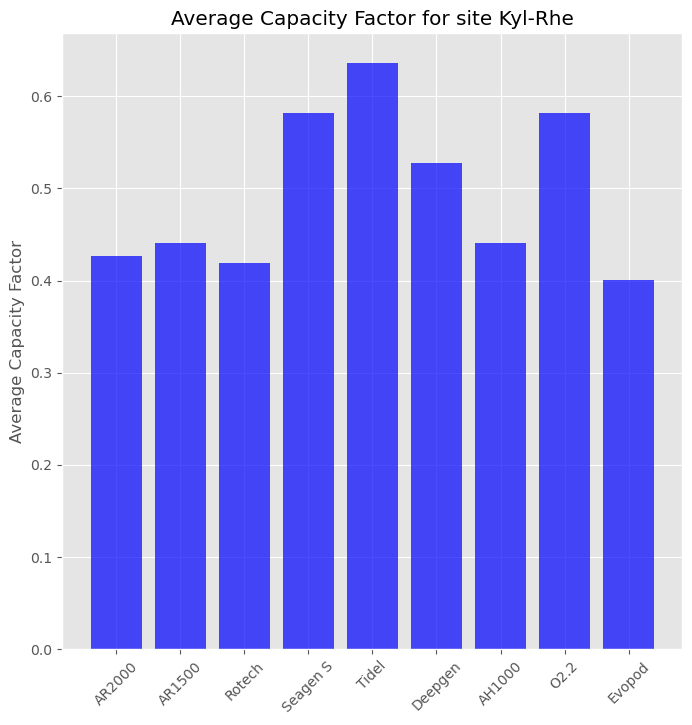

P          2000000
u_rated       3.05
u_out          4.5
u_in             1
D               20
Name: AR2000, dtype: object
Site already in network, p_max_pu for Bri-Cha-Min updated
P          1500000
u_rated          3
u_out            5
u_in             1
D               18
Name: AR1500, dtype: object
Site already in network, p_max_pu for Bri-Cha-Min updated
P          1500000
u_rated       3.08
u_out          4.5
u_in             1
D               16
Name: Rotech, dtype: object
Site already in network, p_max_pu for Bri-Cha-Min updated
P          1000000
u_rated        2.5
u_out          4.5
u_in             1
D               20
Name: Seagen S, dtype: object
Site already in network, p_max_pu for Bri-Cha-Min updated
P          500000
u_rated       2.3
u_out         4.5
u_in          0.7
D              15
Name: Tidel, dtype: object
Site already in network, p_max_pu for Bri-Cha-Min updated
P          1000000
u_rated        2.7
u_out          4.5
u_in             1
D               18
Name

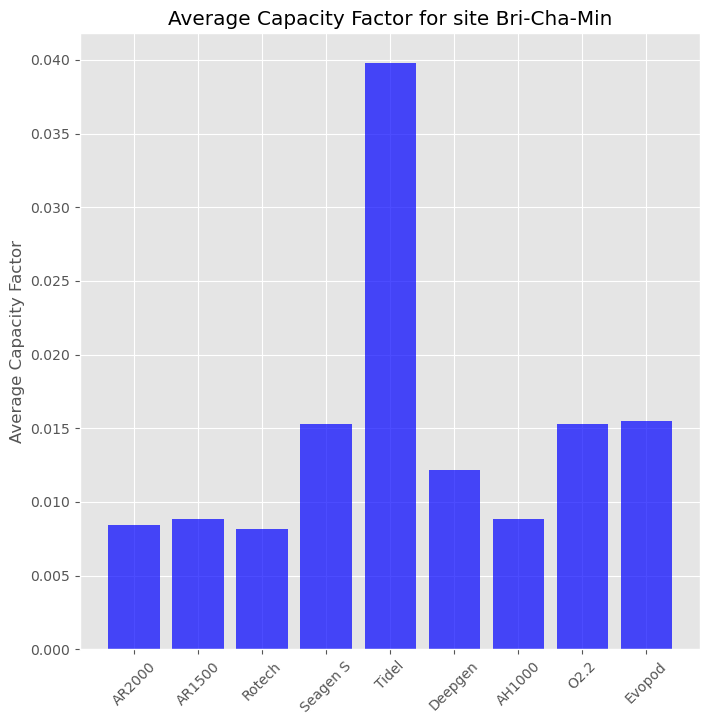

P          2000000
u_rated       3.05
u_out          4.5
u_in             1
D               20
Name: AR2000, dtype: object
Site already in network, p_max_pu for Eas-Cas updated
P          1500000
u_rated          3
u_out            5
u_in             1
D               18
Name: AR1500, dtype: object
Site already in network, p_max_pu for Eas-Cas updated
P          1500000
u_rated       3.08
u_out          4.5
u_in             1
D               16
Name: Rotech, dtype: object
Site already in network, p_max_pu for Eas-Cas updated
P          1000000
u_rated        2.5
u_out          4.5
u_in             1
D               20
Name: Seagen S, dtype: object
Site already in network, p_max_pu for Eas-Cas updated
P          500000
u_rated       2.3
u_out         4.5
u_in          0.7
D              15
Name: Tidel, dtype: object
Site already in network, p_max_pu for Eas-Cas updated
P          1000000
u_rated        2.7
u_out          4.5
u_in             1
D               18
Name: Deepgen, dtype: ob

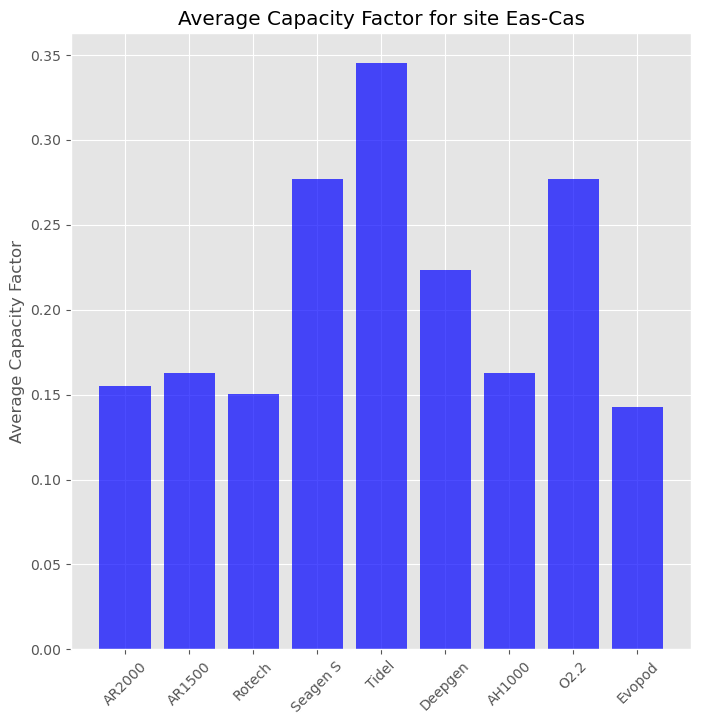

P          2000000
u_rated       3.05
u_out          4.5
u_in             1
D               20
Name: AR2000, dtype: object
Site already in network, p_max_pu for Pen-Fir-Dee updated
P          1500000
u_rated          3
u_out            5
u_in             1
D               18
Name: AR1500, dtype: object
Site already in network, p_max_pu for Pen-Fir-Dee updated
P          1500000
u_rated       3.08
u_out          4.5
u_in             1
D               16
Name: Rotech, dtype: object
Site already in network, p_max_pu for Pen-Fir-Dee updated
P          1000000
u_rated        2.5
u_out          4.5
u_in             1
D               20
Name: Seagen S, dtype: object
Site already in network, p_max_pu for Pen-Fir-Dee updated
P          500000
u_rated       2.3
u_out         4.5
u_in          0.7
D              15
Name: Tidel, dtype: object
Site already in network, p_max_pu for Pen-Fir-Dee updated
P          1000000
u_rated        2.7
u_out          4.5
u_in             1
D               18
Name

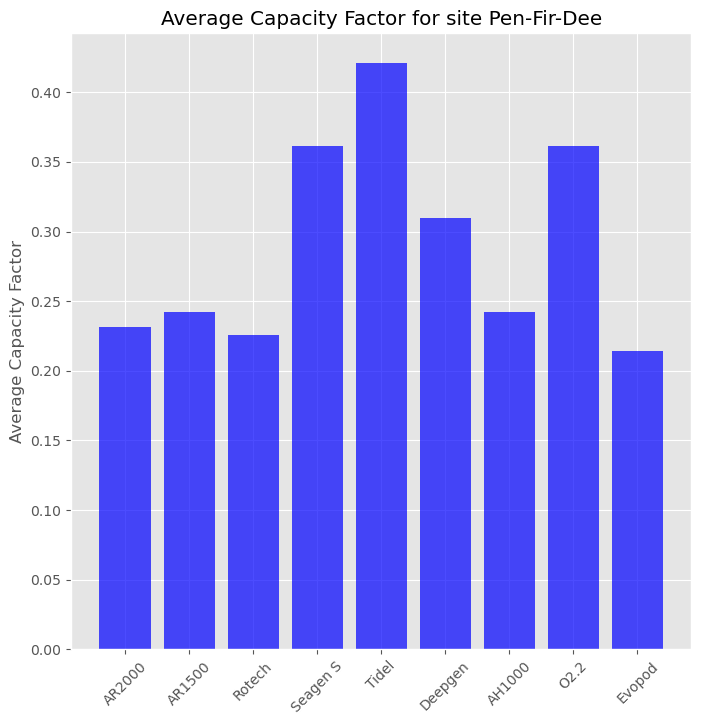

In [8]:

#compare turbine types
import statistics

turbs=['AR2000','AR1500','Rotech','Seagen S','Tidel','Deepgen','AH1000','O2.2','Evopod']
tidal_sites=['Ald-Rac','Kyl-Rhe','Bri-Cha-Min','Eas-Cas','Pen-Fir-Dee']

for site in tidal_sites:
    avg_for_turb=[]
    for turb_type in turbs:

        Tinfo=Turbine_Power_Curve.get_turbine_power_curve(turb_type, plotting="off", cut_in_ramp='off',cut_out='on')

        file='/Users/thomascampbell/PyPSA-GB/data/v_'+str(year)+'.xlsx' #only for 2030 or 2050
        df=pd.read_excel(file,index_col=0)
        
        vdata=df[site]

        data_type='point' 
        capacity=None #not used so can be anything 

        new_site_data =cf_data.add_tidal_generator(network, site, data_type, Tinfo, year, start, 
                            end, vdata, time_step, Pmax=100,plotting="off") 
        
        df=network.generators_t['p_max_pu']
        avg_for_turb.append(np.mean(df[site].values))

    
    # bar chart of average capacity factor for each tidal site
    categories = turbs
    values = avg_for_turb

    plt.figure(figsize=(8, 8))  # Width: 8 inches, Height: 6 inches)

    # Plot the bar chart
    plt.bar(categories, values, color='blue', alpha=0.7)

    # Rotate the x-axis labels
    plt.xticks(rotation=45)
    
    # Add labels and title
    plt.ylabel('Average Capacity Factor')
    plt.title('Average Capacity Factor for site '+str(site))


    # Show the plot
    plt.show()



In [9]:

#work out Pmax for different turbines
import statistics

turbs=['AR2000','AR1500','Rotech','Seagen S','Tidel','Deepgen','AH1000','O2.2','Evopod']
turb_cf=[]

for turb_type in turbs:

        Tinfo=Turbine_Power_Curve.get_turbine_power_curve(turb_type, plotting="off", cut_in_ramp='off',cut_out='on')

        
        vdata='../data/'
        site='Meygen_field'
        data_type='field' 
        capacity=10 #not used so can be anything 

        new_site_data =cf_data.add_tidal_generator(network, site, data_type, Tinfo, year, start, 
                            end, vdata, time_step, Pmax="Get",plotting="off") 
        print('max:'+str(network.generators.loc['Meygen_field','p_nom_max']))
        print('mean_cf:'+str(np.mean(network.generators_t['p_max_pu']['Meygen_field'])))
        


P          2000000
u_rated       3.05
u_out          4.5
u_in             1
D               20
Name: AR2000, dtype: object
no of locs:246
492.0
carrier                    Tidal stream
type                       Tidal stream
p_nom                               NaN
bus                           Peterhead
Turbine Capacity (MW)               NaN
marginal_cost                       0.0
ramp_limit_up                       1.0
ramp_limit_down                     1.0
p_max_pu                            1.0
capital_cost                 145344.472
control                              PQ
p_nom_extendable                  False
p_nom_min                           0.0
p_nom_max                           inf
p_min_pu                            0.0
p_set                               0.0
q_set                               0.0
sign                                1.0
marginal_cost_quadratic             0.0
build_year                            0
lifetime                            inf
efficiency      

P          1000000
u_rated        2.5
u_out          4.5
u_in             1
D               20
Name: O2.2, dtype: object


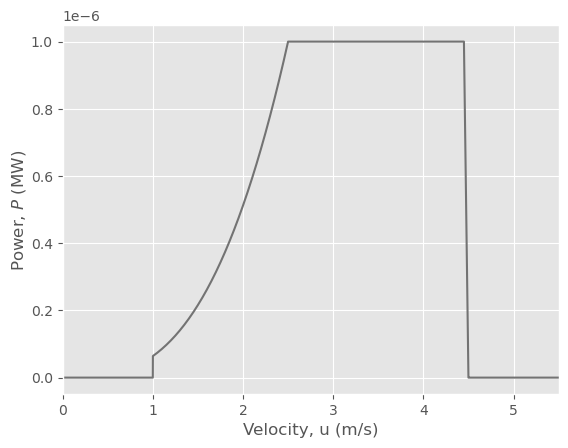

In [10]:
#Turbine Types: SAE AR2000 
#SAE AR1500
#Rotech tidal turbine
#Seagen S
#Tidel Turbine
#Deepgen IV
#AH1000 MK1
#Orbital O2.2

turb_type='O2.2'
Tinfo=Turbine_Power_Curve.get_turbine_power_curve(turb_type, cut_in_ramp='off',cut_out='on')
#creates a turbine power curve from turbine parameters recorded in turbdata excel file

#def_cut_in=1, def_cut_out= 5, def_diameter=20, density=1025,plotting='on', cut_in_ramp='on',cut_out='ramp'
#are alterable variables

#set turbine type and get power curve

In [11]:
cf_data.alter_p_nom(network, 'Wind Onshore',2030,scenario)
cf_data.alter_p_nom(network, 'Solar Photovoltaics',2030,scenario)

#reduce the amount of renewable capacity that is installed where pnom is not extendable

In [12]:
df_generators = network.generators

# set whether p_nom is a variable in the optimisation or set value

df_generators.loc[df_generators.carrier == "Tidal stream", "p_nom_extendable"] = True
#df_generators['p_nom_extendable']=True  

In [13]:

folder='../data/v_' + str(year) + '.xlsx' #only for 2030 or 2050


#using add_tidal_gen to update all existing sites p_max_pu, have to do this before adding new sites or
#new_site_data will be None

path='/Users/thomascampbell/PyPSA-GB/data/renewables/Marine/tidal_stream_future_deployment_scenarios.xlsx'
df=pd.read_excel(path,sheet_name='tidal_stream_additional',index_col=0)

sites=df.index #reading in saved site names

data_type='point' 
capacity=None #not used so can be anything 

for site in sites:

    if site=='Mor':
            site='Wes-Ang-Dem-Mor' #name change between rsc and future dep scenarios

    site_velocities=pd.read_excel(folder,index_col=0)
    #velocity data from https://pubs.rsc.org/en/content/articlehtml/2023/ya/d2ya00251e
    vdata=site_velocities[site].values

    if site=='Wes-Ang-Dem-Mor':
            site='Mor' #name change between rsc and future dep scenarios

    new_site_data = cf_data.add_tidal_generator(network, site, data_type, Tinfo, year, start, 
                            end, vdata, time_step, Pmax=100) 
#add or update velocities for a point site

Site already in network, p_max_pu for Mey updated
Site already in network, p_max_pu for Mor updated
Site already in network, p_max_pu for Isl-Wig updated
Site already in network, p_max_pu for Kyl-Rhe updated
Site already in network, p_max_pu for Wes-Sou updated
Site already in network, p_max_pu for Las-Sou updated
Site already in network, p_max_pu for Sou-Isl updated
Site already in network, p_max_pu for Ald-Rac updated
Site already in network, p_max_pu for Bri updated
Site already in network, p_max_pu for Isl-dem updated
Site already in network, p_max_pu for Bro-Nes updated
Site already in network, p_max_pu for Mul-Gal updated
Site already in network, p_max_pu for Str-Sou updated
Site already in network, p_max_pu for Wes-Isl updated
Site already in network, p_max_pu for Por-Bil updated
Site already in network, p_max_pu for Nes-Dun updated
Site already in network, p_max_pu for Bar updated
Site already in network, p_max_pu for St-Dav-Hea updated
Site already in network, p_max_pu for Ang

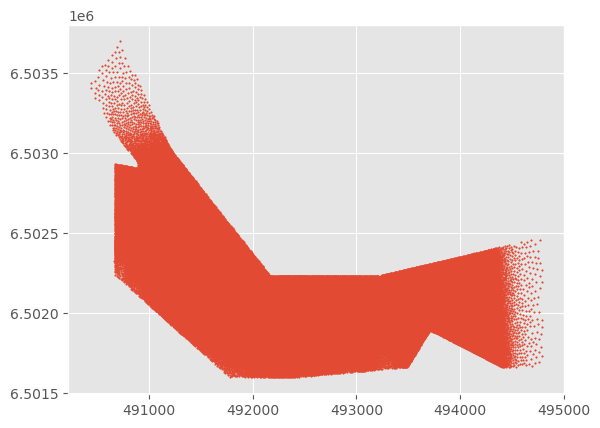

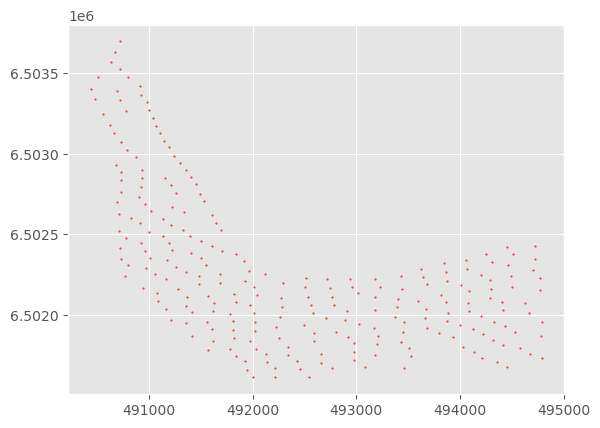

no of locs:253
253.0


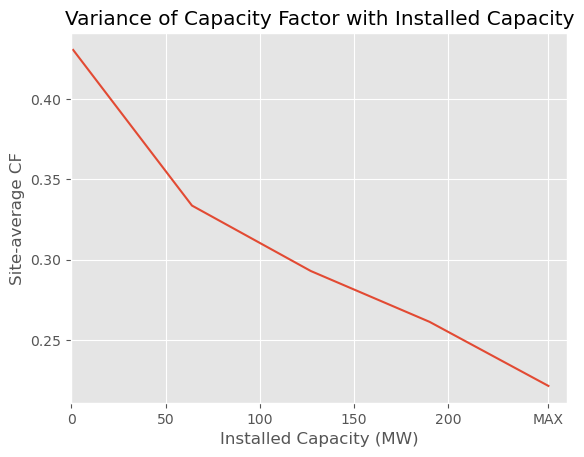

site height2095.817469676025
site width4355.332435189222


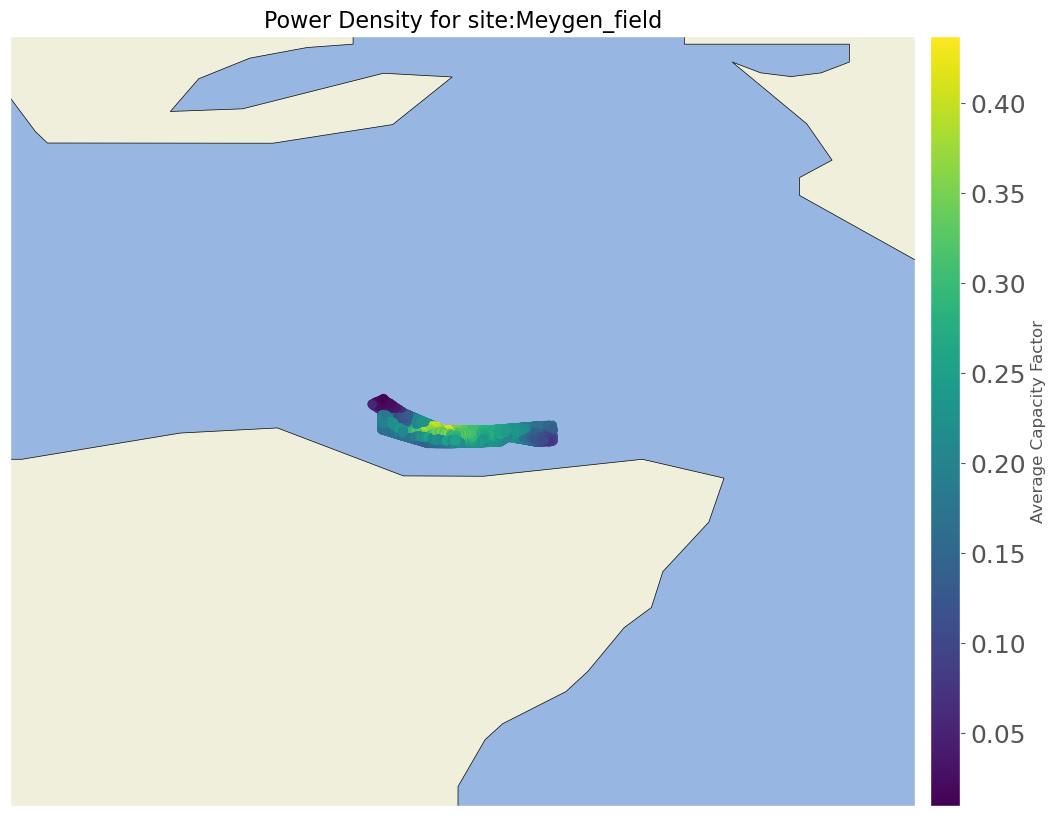

Site already in network, p_max_pu for Meygen_field updated
None


In [14]:

vdata='../data/'

#file location of velocity dataset to be used, can be point or field

site='Meygen_field' #using add_tidal_gen to add an extra tidal site 

data_type='field' 

Capacity=None

new_site_data=cf_data.add_tidal_generator(network, site, data_type, Tinfo, year, start, 
                            end, vdata, time_step, Pmax="Get", capacity=Capacity, do_depth=True) #if new site is being added, need to give plot_sites the data for it to plot correctly


#data_type = "point", single coordinate or "field", multiple coordinates, decides how capacity factor is calculated
#capacity (MW) = select an installed capacity, if p_nom_ext = false, or a guess capacity if 
#p_nom_ext=true i.e. 10 mw
#Tinfo  = the turbine power curve and characteristics calculated earlier
#vdata = the file location to retrieve velocity timeseries from
#capex = capital cost per MW for the site, if not selected will default to the same as other tidal sites
#lat = latitude of site, can be "from file" where the coordinates in the dataset will be used (only for d_type="field")
#lon = longitude of site,can be "from file" where the coordinates in the dataset will be used (only for d_type="field")
#Pmax= maximum capacity of the site, if "Get", the max of the site will be estimated (only for d_type="field")

print(new_site_data)




In [16]:

#can't add 2 new sites at once! it overwrites new_site_data, only an issue for plotting, run this cell OR the one above
folder='../data/'
x_coords = np.load(folder+'x_coords.npy')
y_coords = np.load(folder+'y_coords.npy')
u_vels=np.load(folder+'u_all_time_cut.npy')
v_vels=np.load(folder+'v_all_time_cut.npy')
pnt=[500,50000,100000] # random spots
for i in range(3):


    x=x_coords[pnt[i]]
    y=y_coords[pnt[i]]
    u=u_vels[:,pnt[i]]
    v=v_vels[:,pnt[i]]

    #file location of velocity dataset to be used, can be point or field

    site='Meygen_point'+str(i) #using add_tidal_gen to add an extra tidal site 

    data_type='point' 
    Capacity=253

    new_site_data=cf_data.add_tidal_generator(network, site, data_type, Tinfo, year, start, 
                            end, vdata=[u,v], time_step=time_step, coords=[x,y], Pmax=100, capacity=Capacity)



carrier                    Tidal stream
type                       Tidal stream
p_nom                               0.0
bus                           Peterhead
Turbine Capacity (MW)               NaN
marginal_cost                       0.0
ramp_limit_up                       1.0
ramp_limit_down                     1.0
p_max_pu                            1.0
capital_cost                 145344.472
control                              PQ
p_nom_extendable                   True
p_nom_min                           0.0
p_nom_max                         100.0
p_min_pu                            0.0
p_set                               0.0
q_set                               0.0
sign                                1.0
marginal_cost_quadratic             0.0
build_year                            0
lifetime                            inf
efficiency                          1.0
committable                       False
start_up_cost                       0.0
shut_down_cost                      0.0


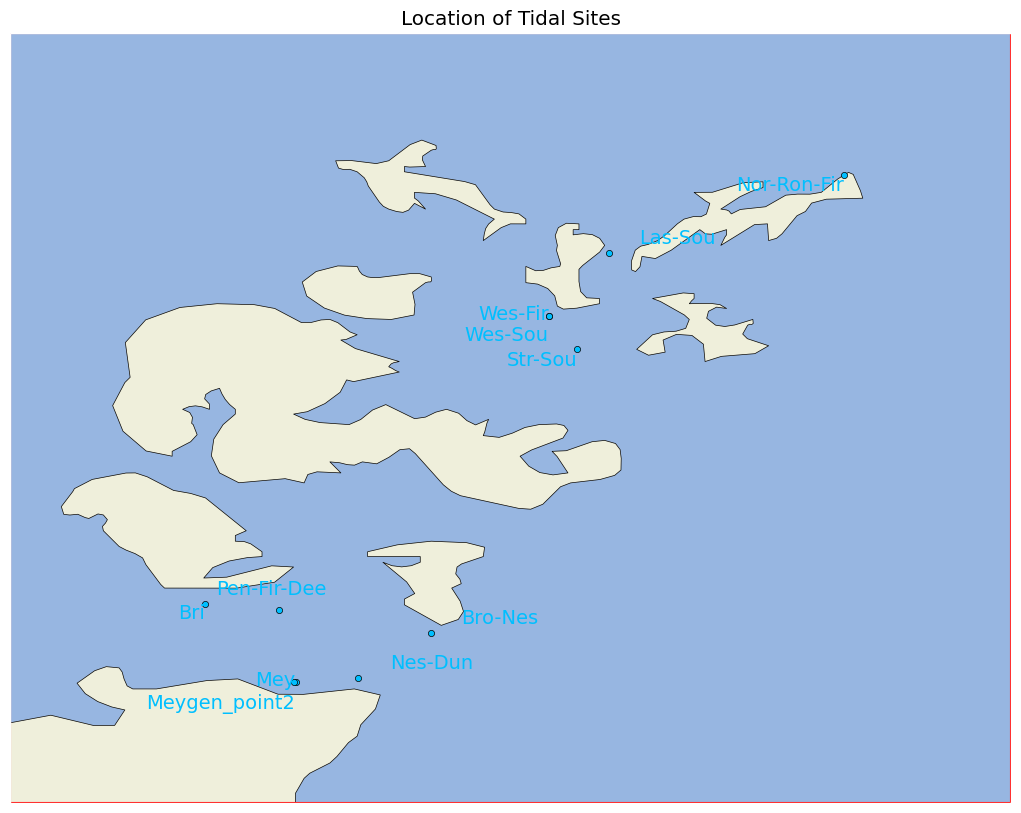

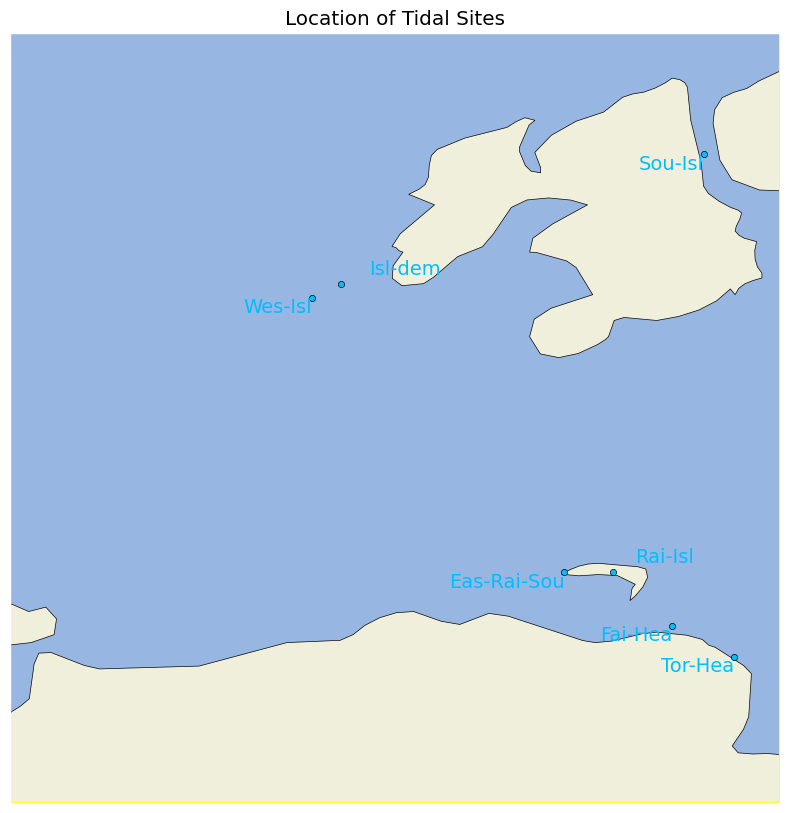

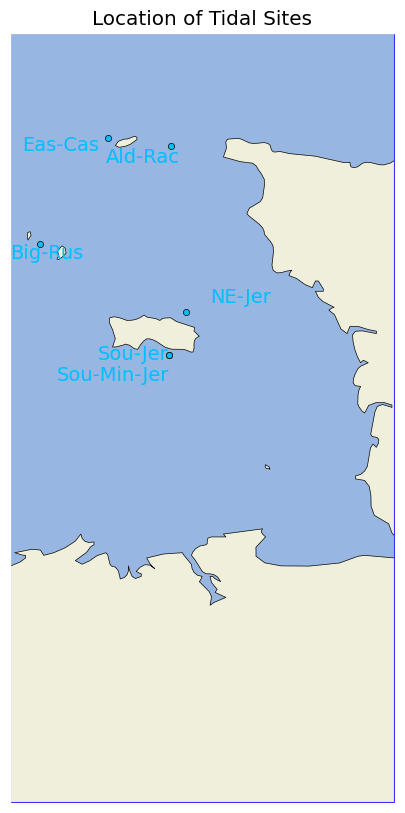

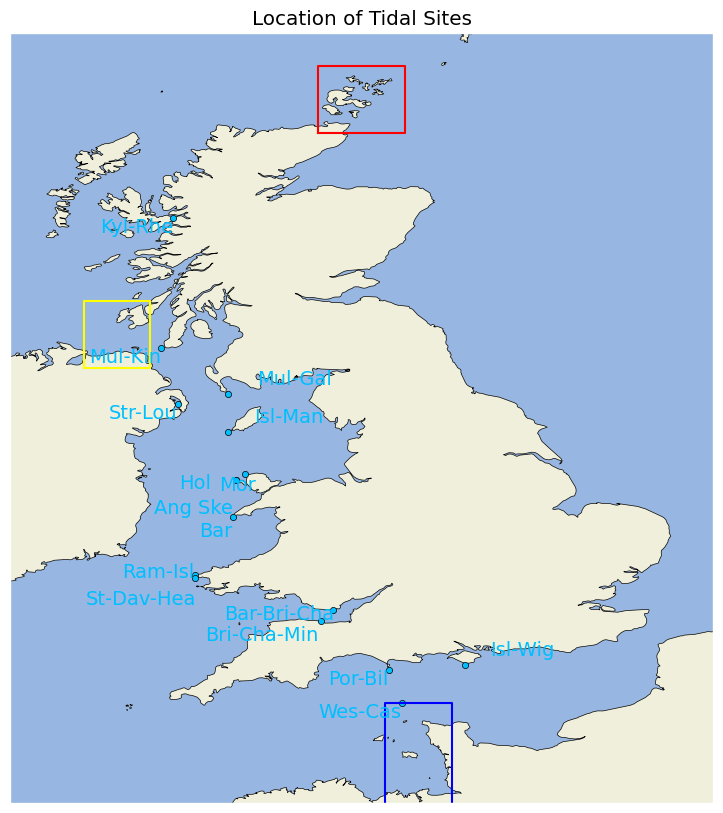

In [17]:
#plot a map of the sites
zooms = [[-3.5, -2.2, 58.5, 59.5],[-7,-6,55,56],[-2.5,-1.5,48,50]]#extent = [minlon, maxlon, minlat, maxlat]

sites=network.generators.loc[network.generators.type=='Tidal stream'].index

for site in sites: 
    if network.generators.loc[site,'p_nom_max']==1E10: 
        network.generators.loc[site,'p_nom_max']=0 #removing sites for the plot where their max capacity is unknown

cf_data.plot_sites('location', network, new_site=new_site_data, marker_scaler=1, zooms=zooms) #plot all tidal sites on a UK map

#map_type = type of plot, "potential" is max capacity values quoted in rsc i.e. p_nom_max #"installed" is the forecasted installed capacity for the year selected i.e. p_nom #"optimal" is the PyPSA calculated optimum capacity for minimum cost, i.e. p_nom_opt

#extent = the area of map to be plotted, preset as whole UK

#new_site = site_data for any new sites to be added to plot, taken from func add_tidal_generator #marker_scaler = size of points

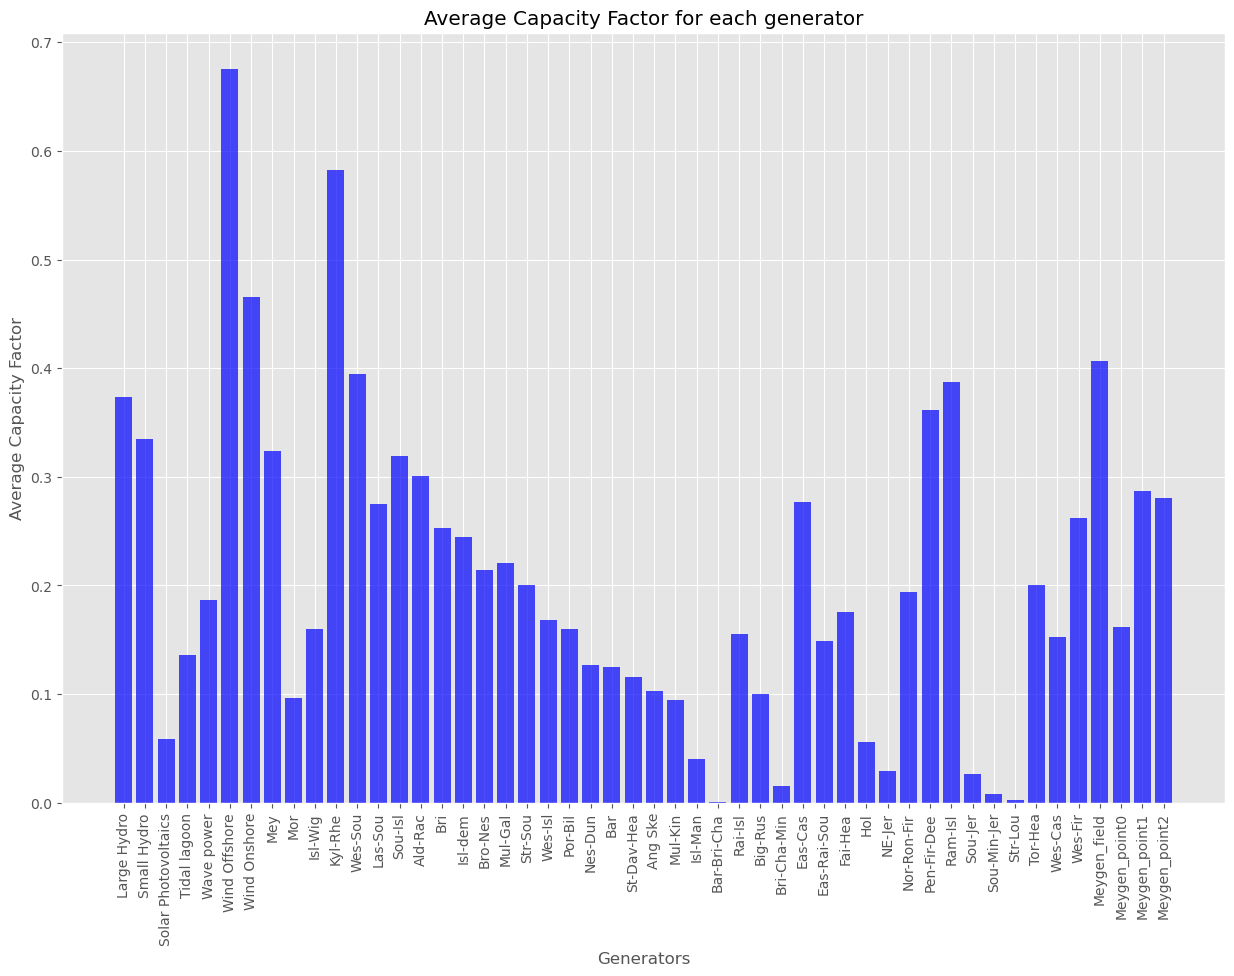

In [18]:
#plot a bar graph comparing avg_cf for each generator type

renewables = ['Large Hydro', 'Small Hydro', 'Solar Photovoltaics', 'Tidal lagoon', 'Wave power', 'Wind Offshore', 'Wind Onshore']

generators_cfs = network.generators_t.p_max_pu

cfs=np.zeros(len(renewables),dtype=object)

for site in generators_cfs.columns:
    #go through every site, find the tech type for that site, 
    #use the tech type to index an array and store the values to that array

    if site != 'Tidal lagoon Harker' and site != 'Tidal lagoon Penwortham':

        carrier=network.generators.loc[site,'carrier']

        if carrier in renewables:
            index = np.where(np.array(renewables) == carrier)[0][0]

            p_max_pu=generators_cfs[site].values

            cf_list_for_type=cfs[index]

            cf_list=np.append(cf_list_for_type,p_max_pu)


            cfs[index]=cf_list

avg_cfs=[]

for i in range(len(cfs)):

        cf_of_type=cfs[i]

        avg_cfs.append(np.mean(cf_of_type))

        if avg_cfs[i]==0:
            avg_cfs=np.delete(avg_cfs,i)

tidal_gens=network.generators.loc[network.generators.type=="Tidal stream"].index
tidal_avg_cfs=[]

for site in tidal_gens:
    p_max_pu = network.generators_t['p_max_pu'][site]
    tidal_avg_cfs.append(np.mean(p_max_pu))

avg_cfs=np.append(avg_cfs,tidal_avg_cfs)
generators=np.append(renewables, tidal_gens)

# bar chart of optimal capacity for each tidal site
categories = generators
values = avg_cfs

# Plot the bar chart
plt.bar(categories, values, color='blue', alpha=0.7)

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Generators')
plt.ylabel('Average Capacity Factor')
plt.title('Average Capacity Factor for each generator')

# Show the plot
plt.show()

In [19]:
contingency_factor = 4
network.lines.s_max_pu *= contingency_factor

In [20]:
#assign p_nom_max based on rsc paper for each site
path='/Users/thomascampbell/PyPSA-GB/data/renewables/Marine/tidal_stream_future_deployment_scenarios.xlsx'
df=pd.read_excel(path,sheet_name='tidal_stream_additional',index_col=0)

sites=df.index

P_nom_max=df['Pnom Max (MW)']

pnommax_sites=['Mey', 'Isl-Wig', 'Kyl-Rhe', 'Ald-Rac', 'Mul-Gal', 'Por-Bil', 'Bar', 'Mul-Kin', 'Bar-Bri-Cha', 'Rai-Isl', 'Big-Rus', 'Bri-Cha-Min', 'Eas-Cas', 'Eas-Rai-Sou', 'Nor-Ron-Fir', 'Pen-Fir-Dee', 'Ram-Isl', 'Str-Lou', 'Wes-Cas'] 


for site in sites:
    if site in pnommax_sites: #removing inf values where site max is not known
        network.generators.loc[site,'p_nom_max']=P_nom_max.loc[site]
    else:
        network.generators.loc[site,'p_nom_max']=100





In [21]:
m=network.optimize.create_model()

if network.generators.loc['Mey','p_nom_extendable']==True:
    Morlais_p_nom = m.variables['Generator-p_nom']['Mor']
    Holyhead_p_nom = m.variables['Generator-p_nom']['Hol']
    Wes_Sou_p_nom = m.variables['Generator-p_nom']['Wes-Sou']
    Wes_Fir_p_nom = m.variables['Generator-p_nom']['Wes-Fir']
    Sou_Isl_p_nom = m.variables['Generator-p_nom']['Sou-Isl']
    Wes_Isl_p_nom = m.variables['Generator-p_nom']['Wes-Isl']
    Isl_Dem_p_nom = m.variables['Generator-p_nom']['Isl-dem']

    constraint_mor= Morlais_p_nom + Holyhead_p_nom <= P_nom_max.loc['Mor']
    constraint_isl= Sou_Isl_p_nom + Wes_Isl_p_nom + Isl_Dem_p_nom <= P_nom_max.loc['Wes-Isl']
    constraint_wes= Wes_Sou_p_nom + Wes_Fir_p_nom <= P_nom_max.loc['Wes-Fir']

    m.add_constraints(constraint_mor, name="Morlais pmax")
    m.add_constraints(constraint_isl, name="Islay pmax")
    m.add_constraints(constraint_wes, name="Westray pmax")

#where sites have been merged in the rsc paper, setting their combined p_nom_max to be the value quoted

Index(['16'], dtype='object', name='Line')
Index(['Tidal lagoon Harker', 'Tidal lagoon Penwortham'], dtype='object', name='Generator')
/Users/thomascampbell/anaconda3/envs/PyPSA-GB/lib/python3.11/site-packages/pypsa/optimization/constraints.py:531: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.

/Users/thomascampbell/anaconda3/envs/PyPSA-GB/lib/python3.11/site-packages/pypsa/optimization/constraints.py:531: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.

/Users/thomascampbell/anaconda3/envs/PyPSA-GB/lib/python3.11/site-packages/scipy/sparse/_construct.py:148: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [22]:
network.optimize.solve_model(solver_name="gurobi")
#calling the solver to run the simulation

INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2024-11-09


INFO:gurobipy:Academic license - for non-commercial use only - expires 2024-11-09
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████████| 9/9 [00:00<00:00, 17.50it/s]
INFO:linopy.io: Writing time: 4.96s


Read LP format model from file /private/var/folders/m7/gvqdjx7s4c3_fx20qsb2mx9c0000gn/T/linopy-problem-vbg8znsy.lp


INFO:gurobipy:Read LP format model from file /private/var/folders/m7/gvqdjx7s4c3_fx20qsb2mx9c0000gn/T/linopy-problem-vbg8znsy.lp


Reading time = 2.12 seconds


INFO:gurobipy:Reading time = 2.12 seconds


obj: 2269838 rows, 700892 columns, 4065723 nonzeros


INFO:gurobipy:obj: 2269838 rows, 700892 columns, 4065723 nonzeros


Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[arm])


INFO:gurobipy:Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[arm])


INFO:gurobipy:


CPU model: Apple M2


INFO:gurobipy:CPU model: Apple M2


Thread count: 8 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:Thread count: 8 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy:


Optimize a model with 2269838 rows, 700892 columns and 4065723 nonzeros


INFO:gurobipy:Optimize a model with 2269838 rows, 700892 columns and 4065723 nonzeros


Model fingerprint: 0x96600cc5


INFO:gurobipy:Model fingerprint: 0x96600cc5


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [6e-05, 1e+00]


INFO:gurobipy:  Matrix range     [6e-05, 1e+00]


  Objective range  [1e+00, 1e+09]


INFO:gurobipy:  Objective range  [1e+00, 1e+09]


  Bounds range     [2e+09, 2e+09]


INFO:gurobipy:  Bounds range     [2e+09, 2e+09]


  RHS range        [1e-05, 7e+12]


INFO:gurobipy:  RHS range        [1e-05, 7e+12]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 2089992 rows and 274899 columns


INFO:gurobipy:Presolve removed 2089992 rows and 274899 columns


Presolve time: 1.05s


INFO:gurobipy:Presolve time: 1.05s


Presolved: 179846 rows, 430451 columns, 935640 nonzeros


INFO:gurobipy:Presolved: 179846 rows, 430451 columns, 935640 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.06s


INFO:gurobipy:Ordering time: 1.06s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 41


INFO:gurobipy: Dense cols : 41


 AA' NZ     : 5.730e+05


INFO:gurobipy: AA' NZ     : 5.730e+05


 Factor NZ  : 9.209e+06 (roughly 300 MB of memory)


INFO:gurobipy: Factor NZ  : 9.209e+06 (roughly 300 MB of memory)


 Factor Ops : 2.288e+09 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.288e+09 (less than 1 second per iteration)


 Threads    : 6


INFO:gurobipy: Threads    : 6


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   1.12108350e+18 -2.33413183e+19  4.85e+05 1.16e-07  1.08e+14     3s


INFO:gurobipy:   0   1.12108350e+18 -2.33413183e+19  4.85e+05 1.16e-07  1.08e+14     3s


   1   8.79951969e+17 -6.33419317e+18  3.42e+05 2.61e+08  6.02e+13     3s


INFO:gurobipy:   1   8.79951969e+17 -6.33419317e+18  3.42e+05 2.61e+08  6.02e+13     3s


   2   4.37604488e+17 -1.94143884e+18  1.56e+05 2.26e+07  2.72e+13     3s


INFO:gurobipy:   2   4.37604488e+17 -1.94143884e+18  1.56e+05 2.26e+07  2.72e+13     3s


   3   9.03842339e+16 -8.25626121e+17  2.81e+04 1.59e+06  5.23e+12     3s


INFO:gurobipy:   3   9.03842339e+16 -8.25626121e+17  2.81e+04 1.59e+06  5.23e+12     3s


   4   2.75838935e+16 -4.61937475e+17  5.13e+03 2.26e+05  1.23e+12     3s


INFO:gurobipy:   4   2.75838935e+16 -4.61937475e+17  5.13e+03 2.26e+05  1.23e+12     3s


   5   1.48851598e+16 -2.50974186e+17  1.92e+03 5.59e+04  4.94e+11     3s


INFO:gurobipy:   5   1.48851598e+16 -2.50974186e+17  1.92e+03 5.59e+04  4.94e+11     3s


   6   9.37371979e+14 -5.67773669e+16  6.58e+01 4.41e+03  6.68e+10     3s


INFO:gurobipy:   6   9.37371979e+14 -5.67773669e+16  6.58e+01 4.41e+03  6.68e+10     3s


   7   3.62196756e+14 -1.37388592e+16  2.95e+01 8.28e+02  1.60e+10     3s


INFO:gurobipy:   7   3.62196756e+14 -1.37388592e+16  2.95e+01 8.28e+02  1.60e+10     3s


   8   2.21197637e+12 -1.52009742e+14  8.65e-02 5.62e-04  1.69e+08     4s


INFO:gurobipy:   8   2.21197637e+12 -1.52009742e+14  8.65e-02 5.62e-04  1.69e+08     4s


   9   2.41432561e+11 -9.84064086e+12  9.03e-03 4.55e-05  1.10e+07     4s


INFO:gurobipy:   9   2.41432561e+11 -9.84064086e+12  9.03e-03 4.55e-05  1.10e+07     4s


  10   7.70512438e+10 -1.25440735e+12  2.53e-03 1.91e-05  1.46e+06     4s


INFO:gurobipy:  10   7.70512438e+10 -1.25440735e+12  2.53e-03 1.91e-05  1.46e+06     4s


  11   3.35804226e+10 -5.06805074e+11  9.99e-04 9.18e-06  5.92e+05     4s


INFO:gurobipy:  11   3.35804226e+10 -5.06805074e+11  9.99e-04 9.18e-06  5.92e+05     4s


  12   1.41826892e+10 -2.73192267e+11  3.64e-04 4.17e-06  3.15e+05     4s


INFO:gurobipy:  12   1.41826892e+10 -2.73192267e+11  3.64e-04 4.17e-06  3.15e+05     4s


  13   8.49892187e+09 -1.38207390e+11  2.09e-04 2.60e-06  1.61e+05     4s


INFO:gurobipy:  13   8.49892187e+09 -1.38207390e+11  2.09e-04 2.60e-06  1.61e+05     4s


  14   5.63684982e+09 -6.66030839e+10  1.37e-04 8.47e-07  7.91e+04     4s


INFO:gurobipy:  14   5.63684982e+09 -6.66030839e+10  1.37e-04 8.47e-07  7.91e+04     4s


  15   2.60663514e+09 -3.47053518e+10  6.64e-05 5.11e-07  4.08e+04     4s


INFO:gurobipy:  15   2.60663514e+09 -3.47053518e+10  6.64e-05 5.11e-07  4.08e+04     4s


  16   1.59802248e+09 -2.51256291e+10  4.59e-05 4.77e-07  2.93e+04     5s


INFO:gurobipy:  16   1.59802248e+09 -2.51256291e+10  4.59e-05 4.77e-07  2.93e+04     5s


  17   9.49411534e+08 -1.65753819e+10  3.43e-05 4.77e-07  1.92e+04     5s


INFO:gurobipy:  17   9.49411534e+08 -1.65753819e+10  3.43e-05 4.77e-07  1.92e+04     5s


  18   1.90563877e+08 -1.08981577e+10  2.22e-05 4.77e-07  1.21e+04     5s


INFO:gurobipy:  18   1.90563877e+08 -1.08981577e+10  2.22e-05 4.77e-07  1.21e+04     5s


  19  -3.11266542e+08 -7.92951948e+09  1.51e-05 4.77e-07  8.34e+03     5s


INFO:gurobipy:  19  -3.11266542e+08 -7.92951948e+09  1.51e-05 4.77e-07  8.34e+03     5s


  20  -8.70672262e+08 -5.28282785e+09  8.37e-06 4.77e-07  4.83e+03     5s


INFO:gurobipy:  20  -8.70672262e+08 -5.28282785e+09  8.37e-06 4.77e-07  4.83e+03     5s


  21  -1.14449964e+09 -3.64547303e+09  5.47e-06 4.77e-07  2.74e+03     5s


INFO:gurobipy:  21  -1.14449964e+09 -3.64547303e+09  5.47e-06 4.77e-07  2.74e+03     5s


  22  -1.36022980e+09 -3.03295692e+09  3.54e-06 4.77e-07  1.83e+03     5s


INFO:gurobipy:  22  -1.36022980e+09 -3.03295692e+09  3.54e-06 4.77e-07  1.83e+03     5s


  23  -1.42654219e+09 -2.70520791e+09  3.02e-06 4.77e-07  1.40e+03     5s


INFO:gurobipy:  23  -1.42654219e+09 -2.70520791e+09  3.02e-06 4.77e-07  1.40e+03     5s


  24  -1.54247962e+09 -2.44928129e+09  2.14e-06 4.77e-07  9.93e+02     6s


INFO:gurobipy:  24  -1.54247962e+09 -2.44928129e+09  2.14e-06 4.77e-07  9.93e+02     6s


  25  -1.64608276e+09 -2.24654291e+09  1.42e-06 4.77e-07  6.57e+02     6s


INFO:gurobipy:  25  -1.64608276e+09 -2.24654291e+09  1.42e-06 4.77e-07  6.57e+02     6s


  26  -1.77287959e+09 -2.11192194e+09  6.03e-07 4.77e-07  3.71e+02     6s


INFO:gurobipy:  26  -1.77287959e+09 -2.11192194e+09  6.03e-07 4.77e-07  3.71e+02     6s


  27  -1.80997295e+09 -2.03950997e+09  3.88e-07 4.77e-07  2.51e+02     6s


INFO:gurobipy:  27  -1.80997295e+09 -2.03950997e+09  3.88e-07 4.77e-07  2.51e+02     6s


  28  -1.82885486e+09 -1.98794954e+09  3.34e-07 4.77e-07  1.74e+02     6s


INFO:gurobipy:  28  -1.82885486e+09 -1.98794954e+09  3.34e-07 4.77e-07  1.74e+02     6s


  29  -1.84279819e+09 -1.96176026e+09  2.64e-07 4.77e-07  1.30e+02     6s


INFO:gurobipy:  29  -1.84279819e+09 -1.96176026e+09  2.64e-07 4.77e-07  1.30e+02     6s


  30  -1.84890203e+09 -1.94193140e+09  2.54e-07 4.77e-07  1.02e+02     6s


INFO:gurobipy:  30  -1.84890203e+09 -1.94193140e+09  2.54e-07 4.77e-07  1.02e+02     6s


  31  -1.86092094e+09 -1.92027855e+09  1.64e-07 4.77e-07  6.50e+01     7s


INFO:gurobipy:  31  -1.86092094e+09 -1.92027855e+09  1.64e-07 4.77e-07  6.50e+01     7s


  32  -1.86776963e+09 -1.90405568e+09  1.20e-07 4.77e-07  3.97e+01     7s


INFO:gurobipy:  32  -1.86776963e+09 -1.90405568e+09  1.20e-07 4.77e-07  3.97e+01     7s


  33  -1.87392168e+09 -1.89692371e+09  9.28e-08 4.77e-07  2.52e+01     7s


INFO:gurobipy:  33  -1.87392168e+09 -1.89692371e+09  9.28e-08 4.77e-07  2.52e+01     7s


  34  -1.87604569e+09 -1.89148868e+09  8.57e-08 4.77e-07  1.69e+01     7s


INFO:gurobipy:  34  -1.87604569e+09 -1.89148868e+09  8.57e-08 4.77e-07  1.69e+01     7s


  35  -1.87775929e+09 -1.88914251e+09  6.38e-08 2.38e-07  1.25e+01     7s


INFO:gurobipy:  35  -1.87775929e+09 -1.88914251e+09  6.38e-08 2.38e-07  1.25e+01     7s


  36  -1.87913787e+09 -1.88731963e+09  4.64e-08 4.77e-07  8.96e+00     7s


INFO:gurobipy:  36  -1.87913787e+09 -1.88731963e+09  4.64e-08 4.77e-07  8.96e+00     7s


  37  -1.88039399e+09 -1.88511329e+09  3.07e-08 4.77e-07  5.17e+00     8s


INFO:gurobipy:  37  -1.88039399e+09 -1.88511329e+09  3.07e-08 4.77e-07  5.17e+00     8s


  38  -1.88108331e+09 -1.88416829e+09  2.31e-08 4.77e-07  3.38e+00     8s


INFO:gurobipy:  38  -1.88108331e+09 -1.88416829e+09  2.31e-08 4.77e-07  3.38e+00     8s


  39  -1.88176813e+09 -1.88345685e+09  1.44e-08 4.77e-07  1.85e+00     8s


INFO:gurobipy:  39  -1.88176813e+09 -1.88345685e+09  1.44e-08 4.77e-07  1.85e+00     8s


  40  -1.88214834e+09 -1.88333678e+09  9.98e-09 4.77e-07  1.30e+00     8s


INFO:gurobipy:  40  -1.88214834e+09 -1.88333678e+09  9.98e-09 4.77e-07  1.30e+00     8s


  41  -1.88222173e+09 -1.88321497e+09  9.01e-09 4.77e-07  1.09e+00     8s


INFO:gurobipy:  41  -1.88222173e+09 -1.88321497e+09  9.01e-09 4.77e-07  1.09e+00     8s


  42  -1.88235706e+09 -1.88309681e+09  7.24e-09 4.77e-07  8.10e-01     9s


INFO:gurobipy:  42  -1.88235706e+09 -1.88309681e+09  7.24e-09 4.77e-07  8.10e-01     9s


  43  -1.88271948e+09 -1.88303508e+09  2.50e-09 4.77e-07  3.46e-01     9s


INFO:gurobipy:  43  -1.88271948e+09 -1.88303508e+09  2.50e-09 4.77e-07  3.46e-01     9s


  44  -1.88277837e+09 -1.88296426e+09  1.84e-09 4.77e-07  2.04e-01     9s


INFO:gurobipy:  44  -1.88277837e+09 -1.88296426e+09  1.84e-09 4.77e-07  2.04e-01     9s


  45  -1.88278732e+09 -1.88295787e+09  1.74e-09 4.77e-07  1.87e-01     9s


INFO:gurobipy:  45  -1.88278732e+09 -1.88295787e+09  1.74e-09 4.77e-07  1.87e-01     9s


  46  -1.88279960e+09 -1.88294208e+09  1.58e-09 4.77e-07  1.56e-01     9s


INFO:gurobipy:  46  -1.88279960e+09 -1.88294208e+09  1.58e-09 4.77e-07  1.56e-01     9s


  47  -1.88280728e+09 -1.88294081e+09  1.48e-09 4.77e-07  1.46e-01    10s


INFO:gurobipy:  47  -1.88280728e+09 -1.88294081e+09  1.48e-09 4.77e-07  1.46e-01    10s


  48  -1.88283983e+09 -1.88293140e+09  1.08e-09 4.77e-07  1.00e-01    10s


INFO:gurobipy:  48  -1.88283983e+09 -1.88293140e+09  1.08e-09 4.77e-07  1.00e-01    10s


  49  -1.88288566e+09 -1.88292577e+09  4.46e-10 4.77e-07  4.39e-02    10s


INFO:gurobipy:  49  -1.88288566e+09 -1.88292577e+09  4.46e-10 4.77e-07  4.39e-02    10s


  50  -1.88290006e+09 -1.88291963e+09  2.87e-10 4.77e-07  2.14e-02    10s


INFO:gurobipy:  50  -1.88290006e+09 -1.88291963e+09  2.87e-10 4.77e-07  2.14e-02    10s


  51  -1.88290254e+09 -1.88291869e+09  2.38e-10 4.77e-07  1.77e-02    11s


INFO:gurobipy:  51  -1.88290254e+09 -1.88291869e+09  2.38e-10 4.77e-07  1.77e-02    11s


  52  -1.88290415e+09 -1.88291839e+09  2.33e-10 4.77e-07  1.56e-02    11s


INFO:gurobipy:  52  -1.88290415e+09 -1.88291839e+09  2.33e-10 4.77e-07  1.56e-02    11s


  53  -1.88290567e+09 -1.88291815e+09  2.33e-10 4.77e-07  1.37e-02    11s


INFO:gurobipy:  53  -1.88290567e+09 -1.88291815e+09  2.33e-10 4.77e-07  1.37e-02    11s


  54  -1.88290631e+09 -1.88291799e+09  2.33e-10 4.77e-07  1.28e-02    11s


INFO:gurobipy:  54  -1.88290631e+09 -1.88291799e+09  2.33e-10 4.77e-07  1.28e-02    11s


  55  -1.88290833e+09 -1.88291773e+09  2.33e-10 4.77e-07  1.03e-02    11s


INFO:gurobipy:  55  -1.88290833e+09 -1.88291773e+09  2.33e-10 4.77e-07  1.03e-02    11s


  56  -1.88291124e+09 -1.88291761e+09  2.33e-10 4.77e-07  6.98e-03    11s


INFO:gurobipy:  56  -1.88291124e+09 -1.88291761e+09  2.33e-10 4.77e-07  6.98e-03    11s


  57  -1.88291206e+09 -1.88291747e+09  2.33e-10 4.77e-07  5.92e-03    12s


INFO:gurobipy:  57  -1.88291206e+09 -1.88291747e+09  2.33e-10 4.77e-07  5.92e-03    12s


  58  -1.88291220e+09 -1.88291739e+09  3.49e-10 7.15e-07  5.68e-03    12s


INFO:gurobipy:  58  -1.88291220e+09 -1.88291739e+09  3.49e-10 7.15e-07  5.68e-03    12s


  59  -1.88291382e+09 -1.88291736e+09  2.33e-10 4.77e-07  3.87e-03    12s


INFO:gurobipy:  59  -1.88291382e+09 -1.88291736e+09  2.33e-10 4.77e-07  3.87e-03    12s


  60  -1.88291609e+09 -1.88291733e+09  2.33e-10 7.15e-07  1.36e-03    12s


INFO:gurobipy:  60  -1.88291609e+09 -1.88291733e+09  2.33e-10 7.15e-07  1.36e-03    12s


  61  -1.88291720e+09 -1.88291724e+09  1.12e-08 4.77e-07  4.78e-05    12s


INFO:gurobipy:  61  -1.88291720e+09 -1.88291724e+09  1.12e-08 4.77e-07  4.78e-05    12s


  62  -1.88291720e+09 -1.88291720e+09  4.74e-09 4.77e-07  2.76e-06    13s


INFO:gurobipy:  62  -1.88291720e+09 -1.88291720e+09  4.74e-09 4.77e-07  2.76e-06    13s


  63  -1.88291720e+09 -1.88291720e+09  1.16e-10 4.77e-07  2.01e-08    13s


INFO:gurobipy:  63  -1.88291720e+09 -1.88291720e+09  1.16e-10 4.77e-07  2.01e-08    13s


  64  -1.88291720e+09 -1.88291720e+09  1.16e-10 7.15e-07  6.41e-10    13s


INFO:gurobipy:  64  -1.88291720e+09 -1.88291720e+09  1.16e-10 7.15e-07  6.41e-10    13s


INFO:gurobipy:


Barrier solved model in 64 iterations and 12.89 seconds (17.84 work units)


INFO:gurobipy:Barrier solved model in 64 iterations and 12.89 seconds (17.84 work units)


Optimal objective -1.88291720e+09


INFO:gurobipy:Optimal objective -1.88291720e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   67655 DPushes remaining with DInf 0.0000000e+00                13s


INFO:gurobipy:   67655 DPushes remaining with DInf 0.0000000e+00                13s


       0 DPushes remaining with DInf 0.0000000e+00                13s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                13s


INFO:gurobipy:


  143043 PPushes remaining with PInf 0.0000000e+00                13s


INFO:gurobipy:  143043 PPushes remaining with PInf 0.0000000e+00                13s


   44712 PPushes remaining with PInf 0.0000000e+00                15s


INFO:gurobipy:   44712 PPushes remaining with PInf 0.0000000e+00                15s


    8752 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:    8752 PPushes remaining with PInf 0.0000000e+00                20s


INFO:gurobipy:


Solved with dual simplex


INFO:gurobipy:Solved with dual simplex


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   88394   -1.8829172e+09   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:   88394   -1.8829172e+09   0.000000e+00   0.000000e+00     22s


INFO:gurobipy:


Solved in 88394 iterations and 21.69 seconds (33.85 work units)


INFO:gurobipy:Solved in 88394 iterations and 21.69 seconds (33.85 work units)


Optimal objective -1.882917200e+09


INFO:gurobipy:Optimal objective -1.882917200e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 700892 primals, 2269838 duals
Objective: -1.88e+09
Solver model: available
Solver message: 2

/Users/thomascampbell/anaconda3/envs/PyPSA-GB/lib/python3.11/site-packages/linopy/common.py:124: UserWarning:

Coordinates across variables not equal. Perform outer join.

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper, Generator-ext-p-lower, Generator-ext-p-upper, Generator-fix-p-ramp_limit_up, Generator-fix-p-ramp_limit_down, Generator-ext-p-ramp_limit_up, Generator-ext-p-ramp_limit_down, Line-fix-s-lower, Line-fix-s-upper, Link-fix-p-lower, Link-fix-p-upper, StorageUnit-fix-p_dispatch-lower, StorageUnit-fix-p_dispatch-upper, StorageUnit-fix-p_store-lower, StorageUnit-fix-p_store-upper, StorageUnit-fix-state_of_charge-lower, StorageUnit-fix-state_of_charge-upper, Kirchhoff-Volt

('ok', 'optimal')

In [23]:
stats=network.statistics().drop( (  'Generator',                   'Unmet Load'))

cap_ex = stats['Capital Expenditure'].values
op_ex  = stats['Operational Expenditure'].values
cap_ex = cap_ex[~np.isnan(cap_ex)]
op_ex = op_ex[~np.isnan(op_ex)]

print(np.sum(cap_ex)+np.sum(op_ex))

#caclulate total cost


18111674334.10109


In [24]:
#calculate tidal LCOE

tidalgens=network.generators.loc[network.generators.type=='Tidal stream'].index.values

for gen in tidalgens:
    p=np.sum(network.generators_t['p'][gen])
    p_nom=np.sum(network.generators.loc[gen,'p_nom'])
    capex=network.generators.loc[gen,'capital_cost']
    print(gen,capex*p_nom/p)

Mey inf
Mor inf
Isl-Wig inf
Kyl-Rhe inf
Wes-Sou inf
Las-Sou inf
Sou-Isl inf
Ald-Rac inf
Bri inf
Isl-dem inf
Bro-Nes inf
Mul-Gal inf
Str-Sou inf
Wes-Isl inf
Por-Bil inf
Nes-Dun inf
Bar inf
St-Dav-Hea inf
Ang Ske inf
Mul-Kin inf
Isl-Man inf
Bar-Bri-Cha nan
Rai-Isl nan
Big-Rus nan
Bri-Cha-Min nan
Eas-Cas nan
Eas-Rai-Sou nan
Fai-Hea nan
Hol nan
NE-Jer nan
Nor-Ron-Fir nan
Pen-Fir-Dee nan
Ram-Isl nan
Sou-Jer nan
Sou-Min-Jer nan
Str-Lou nan
Tor-Hea nan
Wes-Cas nan
Wes-Fir nan
Meygen_field nan
Meygen_point0 nan
Meygen_point1 nan
Meygen_point2 nan


/var/folders/m7/gvqdjx7s4c3_fx20qsb2mx9c0000gn/T/ipykernel_75032/2539241101.py:9: RuntimeWarning:

divide by zero encountered in scalar divide

/var/folders/m7/gvqdjx7s4c3_fx20qsb2mx9c0000gn/T/ipykernel_75032/2539241101.py:9: RuntimeWarning:

invalid value encountered in scalar divide



In [25]:
# define dataframe containing time series of real power generated, arranged by generation and storage types
p_by_type = network.generators_t.p.groupby(network.generators.type, axis=1).sum()

print(p_by_type.columns)

# Combining Hydro types into a single category and removing
p_by_type['Hydro'] = (p_by_type['Small Hydro'] + p_by_type['Large Hydro'])

p_by_type.drop('Small Hydro', axis=1, inplace=True)
p_by_type.drop('Large Hydro', axis=1, inplace=True)

# Combining Diesel/Gas oil types into a single category and removing
p_by_type['Diesel'] = (p_by_type['Diesel/Gas oil'] + p_by_type['Diesel/gas Diesel/Gas oil'])

p_by_type.drop('Diesel/Gas oil', axis=1, inplace=True)
p_by_type.drop('Diesel/gas Diesel/Gas oil', axis=1, inplace=True)


# Combining Nuclear types into a single category and removing
p_by_type['Nuclear'] = (p_by_type['AGR'] + p_by_type['PWR'])

p_by_type.drop('AGR', axis=1, inplace=True)
p_by_type.drop('PWR', axis=1, inplace=True)

# Sorting generation types alphabetically
p_by_type = p_by_type[sorted(p_by_type.columns)]

# concatenating storage types
storage_by_type = network.storage_units_t.p.groupby(network.storage_units.carrier, axis=1).sum()
p_by_type = pd.concat([p_by_type, storage_by_type], axis=1)
p_by_type.drop('P2G', axis=1, inplace=True)

# Including Interconnectors Import
imp = network.links_t.p0.copy()
imp[imp < 0] = 0
imp['Interconnectors Import'] = imp.sum(axis=1)
interconnector_import = imp[['Interconnectors Import']]
p_by_type = pd.concat([p_by_type, interconnector_import], axis=1)

# Including Interconnectors Export (note that post-processing occurs later in script)
exp = network.links_t.p0.copy()
exp[exp > 0] = 0
exp['Interconnectors Export'] = exp.sum(axis=1)
interconnector_export = exp[['Interconnectors Export']]

# Renaming Interconnector Import
p_by_type = p_by_type.rename(columns={'Interconnector': 'Interconnectors Import'})

p_nom_walpole=network.generators.p_nom['Wind Offshore Walpole']
p_avail_walpole=p_nom_walpole*network.generators_t.p_max_pu['Wind Offshore Walpole']
p_opt_walpole=network.generators_t.p['Wind Offshore Walpole']

Index(['AGR', 'Biomass (co-firing)', 'Biomass (dedicated)', 'CCGT',
       'CCS Biomass', 'CCS Gas', 'Conventional steam', 'Diesel/Gas oil',
       'Diesel/gas Diesel/Gas oil', 'Floating Wind', 'Hydrogen', 'Large Hydro',
       'OCGT', 'PWR', 'Small Hydro', 'Solar Photovoltaics', 'Tidal lagoon',
       'Tidal stream', 'Unmet Load', 'Waste', 'Wave power', 'Wind Offshore',
       'Wind Onshore'],
      dtype='object', name='type')


/var/folders/m7/gvqdjx7s4c3_fx20qsb2mx9c0000gn/T/ipykernel_75032/1148411402.py:2: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.

/var/folders/m7/gvqdjx7s4c3_fx20qsb2mx9c0000gn/T/ipykernel_75032/1148411402.py:29: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.



In [33]:
# Removing columns where generation is zero

p_by_type = p_by_type.loc[:, (p_by_type > 1E-3).any()]

# Setting all negative generation values to zero

p_by_type[p_by_type < 0] = 0 # ideally stacked area chart would show all generation and charging# Define colors for each generation/storage/interconnector type (note that Interconnector Export colour not defined in this way)

colors = {'Anaerobic Digestion': 'darkgoldenrod',
          'Biomass (co-firing)': 'yellowgreen',
          'Biomass (dedicated)': 'olivedrab',
          'CCGT': 'red',
          'CCS Biomass': 'darkolivegreen',
          'CCS Gas': 'lightcoral',
          'Diesel': 'lightgrey',
          'EfW Incineration': 'chocolate',
          'Floating Wind': 'royalblue',
          'Hydro': 'teal',
          'Hydrogen': 'paleturquoise',
          'Landfill Gas': 'olive',
          'Nuclear': 'lime',
          'OCGT': 'red',
          'Sewage Sludge Digestion': 'saddlebrown',
          'Solar Photovoltaics': 'yellow',
          'Tidal lagoon': 'mediumblue',
          'Tidal stream': 'midnightblue',
          'Unmet Load': 'black',
          'Wave power': 'steelblue',
          'Wind Offshore': 'cornflowerblue',
          'Wind Onshore': 'mediumseagreen',
          'Battery': 'mediumorchid',
          'Compressed Air': 'plum',
          'Liquid Air': 'thistle',
          'Pumped Storage Hydroelectric': 'deepskyblue',
          'Interconnectors Import': 'palevioletred',
          'P2G': 'black'
         }

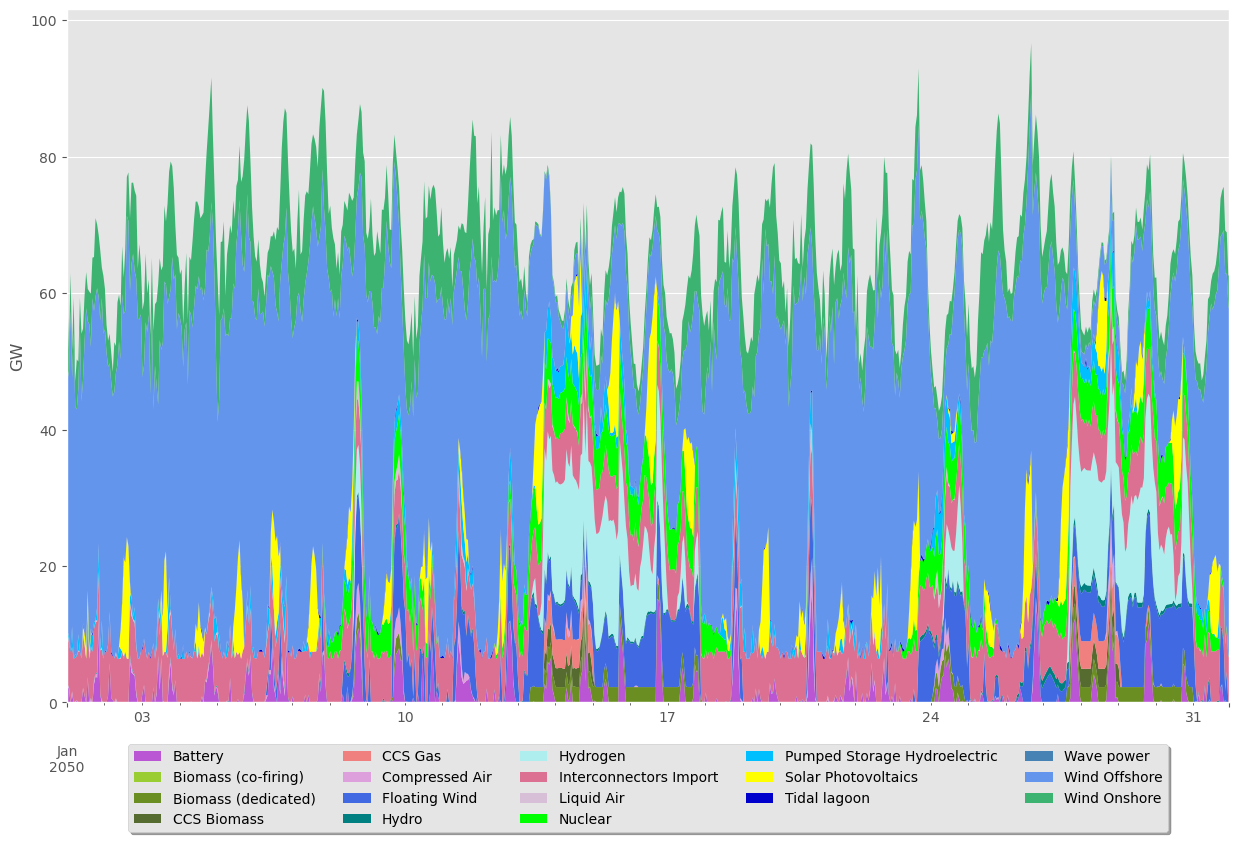

In [34]:
# Plot network-wide generation time series by generation type
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)


(p_by_type/1E3).plot(
    kind='area', ax=ax, linewidth=0,
    color= [colors[col] for col in p_by_type.columns])


# stacked area plot of negative values, prepend column names with '_' such that they don't appear in the legend
#(interconnector_export / 1e3).plot.area(ax=ax, stacked=True, linewidth=0.)

# rescale the y axis
#ax.set_ylim([(interconnector_export / 1e3).sum(axis=1).min(), (p_by_type / 1e3).sum(axis=1).max()])

# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
ax.set_ylabel('GW')
ax.set_xlabel('')

plt.show()


In [28]:
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
ax.set_ylabel('GW')
ax.set_xlabel('')

plt.show()

# arrange p_by_type columns into alphabetical order to ensure consistency with EI factors
p_by_type = p_by_type[sorted(p_by_type.columns)]

# create a numpy array from a list of generation types, from top row of generation mix dataframe
types = np.asarray(list(p_by_type.columns.values))

# reading in the emissions intensity data contained in relevant .csv as a dataframe
emissions_intensity = pd.read_csv('../data/emissions_intensity_by_types.csv')
emissions_intensity_LOPF = emissions_intensity[emissions_intensity['Type'].isin(types)]
emissions_intensity_LOPF.sort_values('Type')
EI_factors = emissions_intensity_LOPF['Emissions Intensity [gCO2/kWh]'].to_numpy()

# Create energy generation mix dataframe by multiplying power generation mix by the time step [MWh]
E_by_type = p_by_type.multiply(time_step)

# Create emissions dataframe. Multiply all columns in the energy dataframe by the numpy array of emissions intensity factors
Emit_by_type = E_by_type.multiply(EI_factors, axis=1)

# Convert gCO2/kWh * MWh to teCO2; the quotient of kWh:MWh (1e3) and gCO2:teCO2 (1e6) = 1e3
Emit_by_type_te = Emit_by_type.div(1e3)
Emit_by_type_te = Emit_by_type_te.loc[:, Emit_by_type_te.any()]

# Time series of total emissions in tonnes (sum of emissions from all types - including interconnectors unless explicitly modified)
Total_Emit_t_te = Emit_by_type_te.sum(axis=1)
print(np.sum(Total_Emit_t_te.values))

1050104.518866832


['Beauly' 'Peterhead' 'Errochty' 'Denny/Bonnybridge' 'Neilston'
 'Strathaven' 'Torness' 'Eccles' 'Harker' 'Stella West' 'Penwortham'
 'Deeside' 'Daines' 'Th. Marsh/Stocksbridge' 'Thornton/Drax/Eggborough'
 'Keadby' 'Ratcliffe' 'Feckenham' 'Walpole' 'Bramford' 'Pelham'
 'Sundon/East Claydon' 'Melksham' 'Bramley' 'London' 'Kemsley' 'Sellindge'
 'Lovedean' 'S.W.Penisula']
Index(['Beauly', 'Peterhead', 'Errochty', 'Denny', 'Neilston', 'Strathaven',
       'Torness', 'Eccles', 'Harker', 'Stella West', 'Penwortham', 'Deeside',
       'Daines', 'Stocksbridge', 'Eggborough', 'Keadby', 'Ratcliffe',
       'Feckenham', 'Walpole', 'Bramford', 'Pelham', 'Sundon', 'Melksham',
       'Bramley', 'London', 'Kemsley', 'Sellindge', 'Lovedean',
       'S.W.Penisula'],
      dtype='object', name='name')


/Users/thomascampbell/anaconda3/envs/PyPSA-GB/lib/python3.11/site-packages/cartopy/mpl/style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".

/Users/thomascampbell/anaconda3/envs/PyPSA-GB/lib/python3.11/site-packages/cartopy/mpl/style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".

/Users/thomascampbell/anaconda3/envs/PyPSA-GB/lib/python3.11/site-packages/cartopy/mpl/style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".

/Users/thomascampbell/anaconda3/envs/PyPSA-GB/lib/python3.11/site-packages/cartopy/mpl/style.py:76: UserWarning:

facecolor will have no effect as it has been defined as "never".



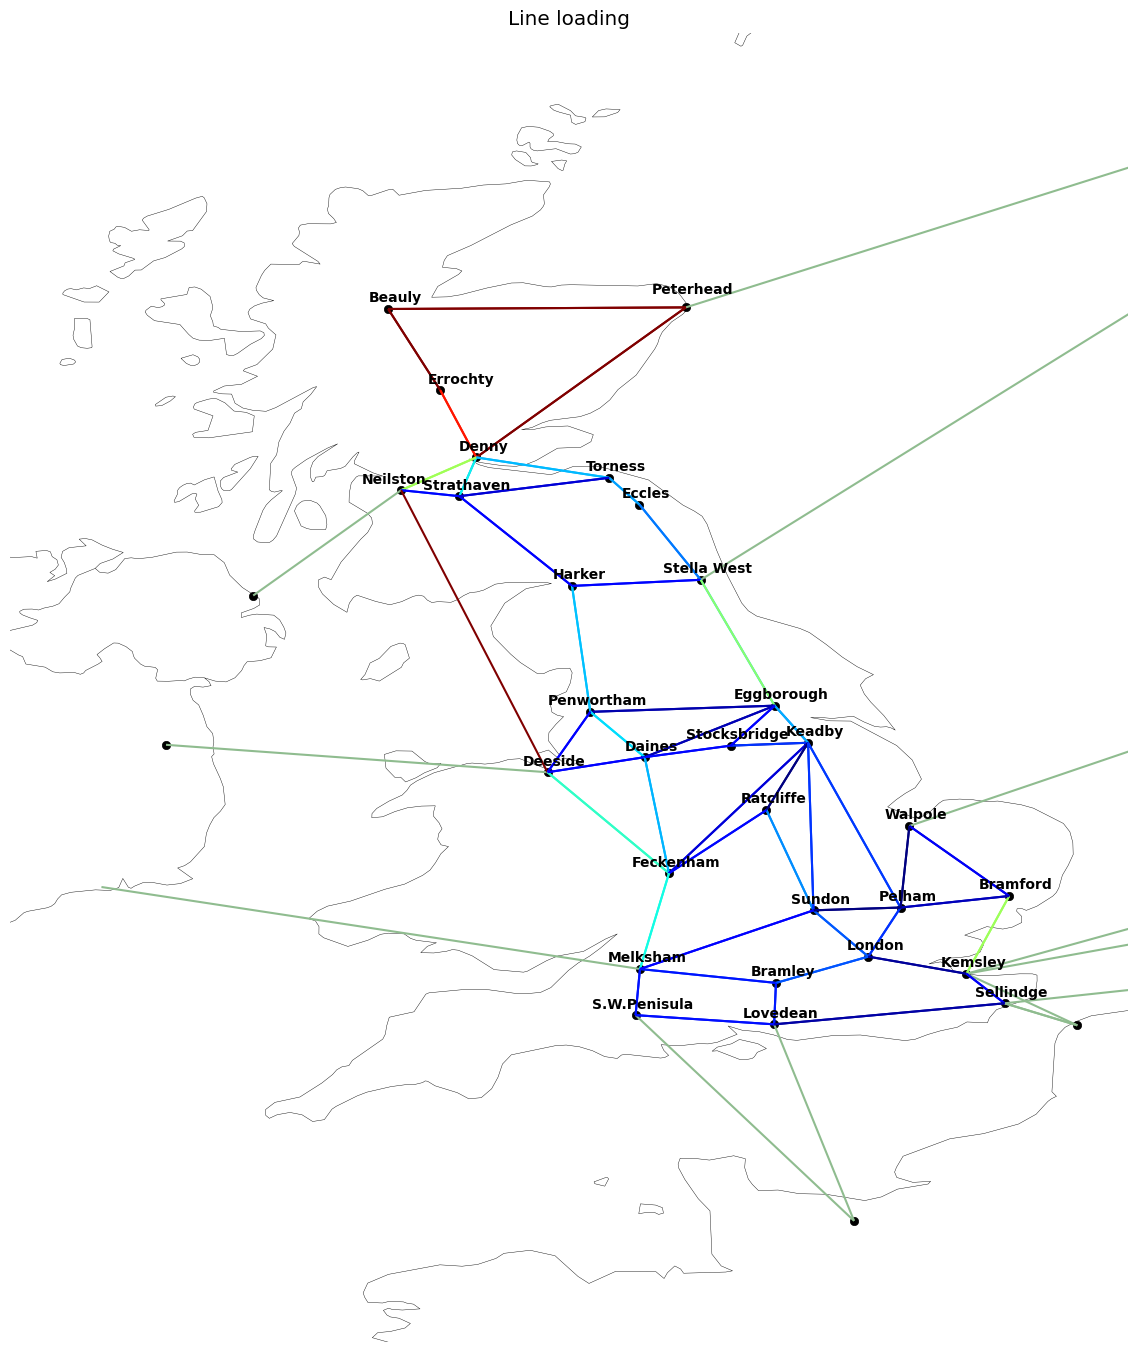

In [29]:
from adjustText import adjust_text  # Import adjust_text

#Line loading plot

df_network = pd.read_csv('../data/network/BusesBasedGBsystem/buses.csv')
lon = df_network['x'].values
lat = df_network['y'].values
df_buses = pd.read_csv('../data/network/BusesBasedGBsystem/buses.csv', index_col=0)
loading = np.max(network.lines_t.p0, axis=0) / (4 * network.lines.s_nom)

fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(15, 17)
ax.scatter(lon, lat, c='black', edgecolors='black')

index=df_buses[:29].index.values
print(index)
index[3]='Denny'
index[13]='Stocksbridge'
index[14]='Eggborough'
index[21]='Sundon'

xytexts=[(5, 5)]*len(df_buses[:29].index)
xytexts[1]=(5,10)
xytexts[2]=(15,5)
xytexts[4]=(-5,5)
print(df_buses[:29].index)
texts = []

network.plot(ax=ax, line_colors=abs(loading), line_cmap=plt.cm.jet, title="Line loading", boundaries=[-8, 2.25, 48, 60], bus_sizes=1E-10)
for i, txt in enumerate(df_buses[:29].index):
    annotation = ax.annotate(txt, (lon[i], lat[i]),
                             xytext=xytexts[i],
                             textcoords="offset points",
                             ha='center',
                             fontweight='extra bold',
                             color='black',
                             fontsize='medium')
    texts.append(annotation)

plt.savefig('scenario4ll.png')


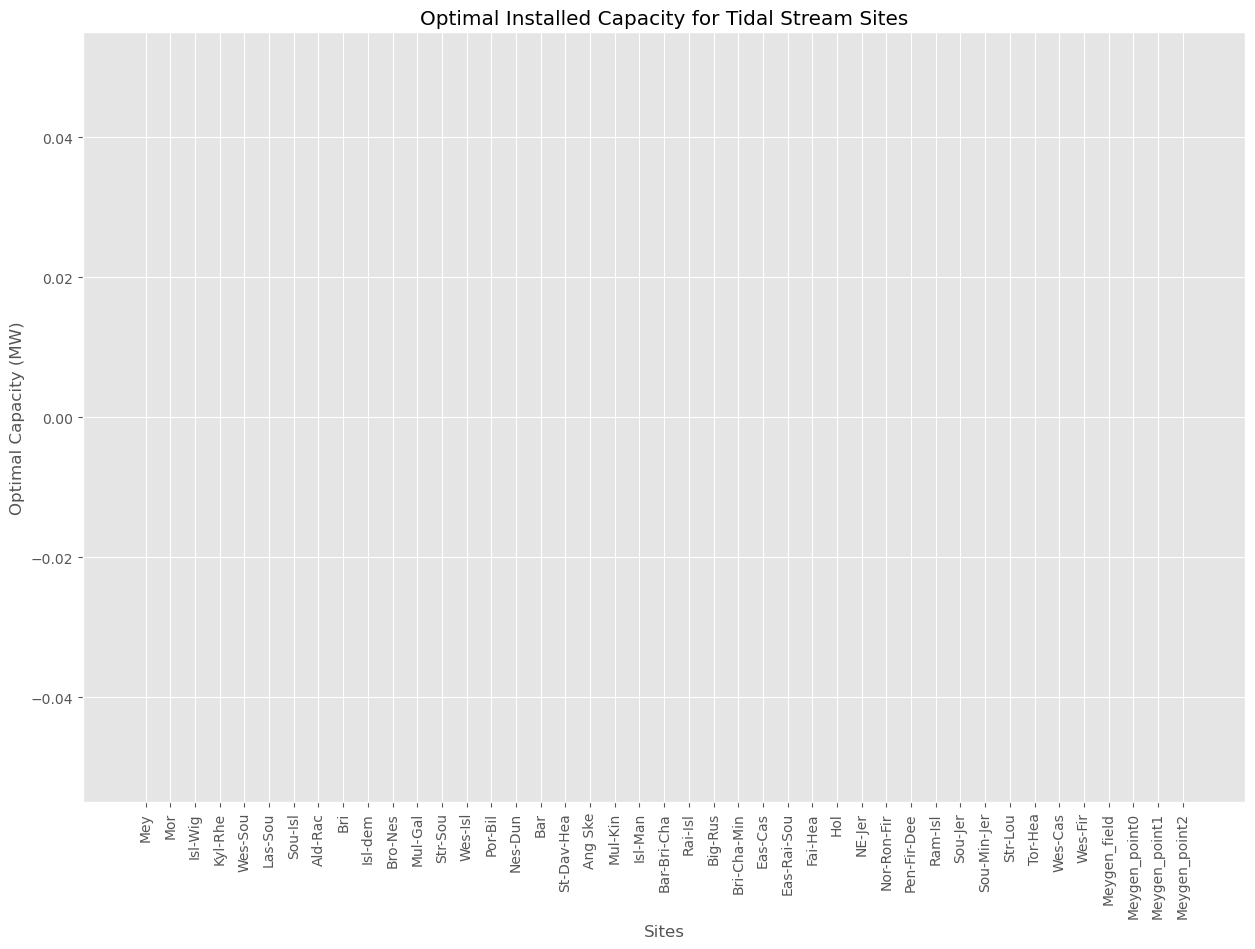

In [30]:
# bar chart of optimal capacity for each tidal site
categories = network.generators.loc[network.generators.type == "Tidal stream", "p_nom_opt"].index
values = network.generators.loc[network.generators.type == "Tidal stream", "p_nom_opt"].values

# Plot the bar chart
plt.bar(categories, values, color='blue', alpha=0.7)

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Sites')
plt.ylabel('Optimal Capacity (MW)')
plt.title('Optimal Installed Capacity for Tidal Stream Sites')

# Show the plot
plt.show()

In [31]:
network.statistics()

Capacity Factor  \
            carrier                                         
Generator   Biomass (co-firing)                  0.216892   
            Biomass (dedicated)                  0.216841   
            CCS Biomass                          0.083050   
            CCS Gas                              0.088692   
            Coal                                      NaN   
            Hydrogen                             0.194796   
            Large Hydro                          0.137641   
            Natural Gas                               NaN   
            Nuclear                              0.318814   
            Oil                                       NaN   
            Small Hydro                          0.101568   
            Solar Photovoltaics                  0.056711   
            Tidal lagoon                         0.139259   
            Tidal stream                              NaN   
            Unmet Load                           0.000000   
            Waste                                0.000000   
            Wave power                           0.126272   
            Wind Offshore                        0.436795   
            Wind Onshore                         0.244686   
Line        AC                                   0.502416   
Link        DC                                   0.509003   
Load        -                                         NaN   
StorageUnit Battery                              0.131069   
            Compressed Air                       0.150684   
            Liquid Air                           0.132867   
            P2G                                  0.014899   
            Pumped Storage Hydroelectric         0.450091   

                                          Capital Expenditure   Curtailment  \
            carrier                                                           
Generator   Biomass (co-firing)                  7.670315e+06  0.000000e+00   
            Biomass (dedicated)                  4.423064e+08  0.000000e+00   
            CCS Biomass                          3.947956e+08  0.000000e+00   
            CCS Gas                              2.268909e+08  0.000000e+00   
            Coal                                 0.000000e+00  0.000000e+00   
            Hydrogen                             1.928829e+09  0.000000e+00   
            Large Hydro                          1.635963e+08  3.425604e+05   
            Natural Gas                          0.000000e+00  0.000000e+00   
            Nuclear                              1.159211e+09  0.000000e+00   
            Oil                                  0.000000e+00  0.000000e+00   
            Small Hydro                          2.143716e+07  3.339445e+04   
            Solar Photovoltaics                  5.291104e+08  1.238691e+05   
            Tidal lagoon                         1.093540e+05  2.369009e+03   
            Tidal stream                         0.000000e+00  0.000000e+00   
            Unmet Load                           0.000000e+00  0.000000e+00   
            Waste                                3.623074e+08  0.000000e+00   
            Wave power                           3.710327e+06  1.208468e+03   
            Wind Offshore                        7.062531e+09  1.673373e+07   
            Wind Onshore                         1.374344e+09  5.673968e+06   
Line        AC                                   0.000000e+00           NaN   
Link        DC                                   0.000000e+00           NaN   
Load        -                                             NaN           NaN   
StorageUnit Battery                              1.352942e+09  0.000000e+00   
            Compressed Air                       1.370344e+08  0.000000e+00   
            Liquid Air                           1.005417e+08  0.000000e+00   
            P2G                                  2.236375e+09  0.000000e+00   
            Pumped Storage Hydroelectric         2.321961e+0

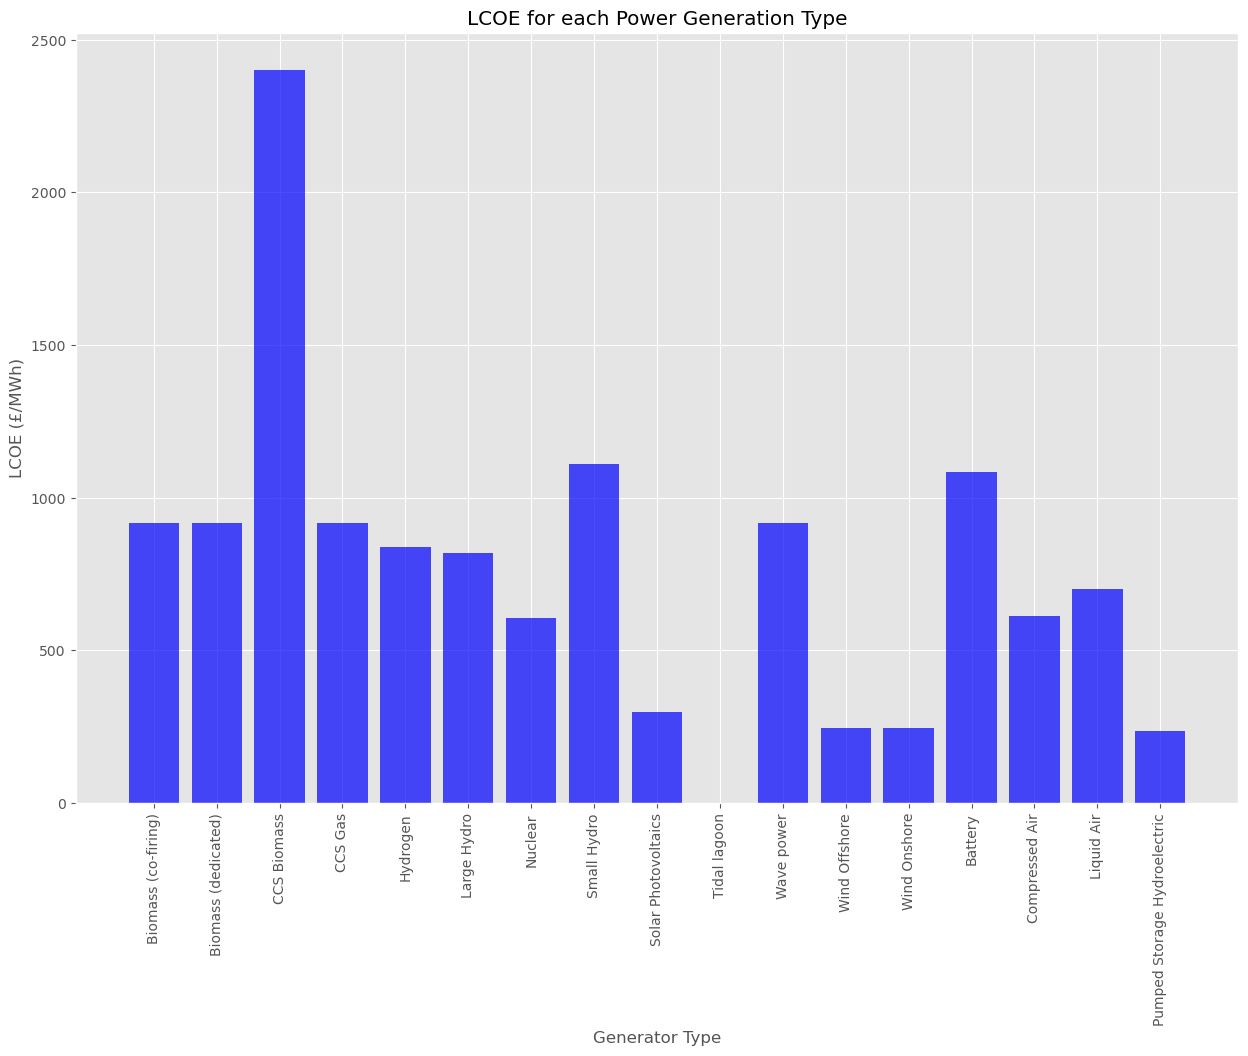

In [32]:

# LCOE of each generation type

cap_ex = network.statistics()['Capital Expenditure']
op_ex  = network.statistics()['Operational Expenditure']
p = network.statistics()['Supply']

cap_ex=cap_ex.drop( index=('StorageUnit',                          'P2G'))
op_ex=op_ex.drop( index=('StorageUnit',                          'P2G'))
p=p.drop( index=('StorageUnit',                          'P2G'))

cap_ex=cap_ex.drop( index= (       'Line',                           'AC'))
cap_ex=cap_ex.drop( index= (       'Link',                           'DC'))
cap_ex=cap_ex.drop( index= (       'Load',                            '-'))

op_ex=op_ex.drop( index= (       'Line',                           'AC'))
op_ex=op_ex.drop( index= (       'Link',                           'DC'))
op_ex=op_ex.drop( index= (       'Load',                            '-'))

p=p.drop( index= (       'Line',                           'AC'))
p=p.drop( index= (       'Link',                           'DC'))
p=p.drop( index= (       'Load',                            '-'))

LCOE=[]


for gen in cap_ex.index:
    if p[gen]>1E-3:
        LCOE.append((cap_ex[gen]+op_ex[gen])/p[gen])
    else:
        cap_ex=cap_ex.drop(index=gen)

gens = cap_ex.index.get_level_values(1).tolist()

values=LCOE
categories=gens

# Plot the bar chart
plt.bar(categories, values, color='blue', alpha=0.7)

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Generator Type')
plt.ylabel('LCOE (£/MWh)')
plt.title('LCOE for each Power Generation Type')


# Show the plot
plt.show()